In [32]:
col = 'crim	zn	indus	chas	nox	rm	age	dis	rad	tax	ptratio	b	lstat	medv'.split()
len(col)

14

#### Price 예측 - 다항회귀
- 데이터셋 : hosing.csv
- 학습종류 : 지도학습 / 회귀Regression - 값을 예측
- 알고리즘 : 다항회귀, knn
- 피쳐 : 나머지 모두
- 타겟: medv



In [33]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 
from sklearn.preprocessing import MinMaxScaler
                            ## 정규화

In [34]:
houseDict = {x:[] for x in col}

In [35]:
houseDF = pd.DataFrame(pd.read_csv('../data/housing.csv', header=None))
for i in houseDF.index:
    for j in range(14):
        houseDict[col[j]].append(houseDF.iloc[i,:][0].split()[j])
    
# houseDF.iloc[1,:]

In [36]:
houDF = pd.DataFrame(houseDict)
houDF = houDF.astype(float)
houDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [37]:
### 데이터 시각화

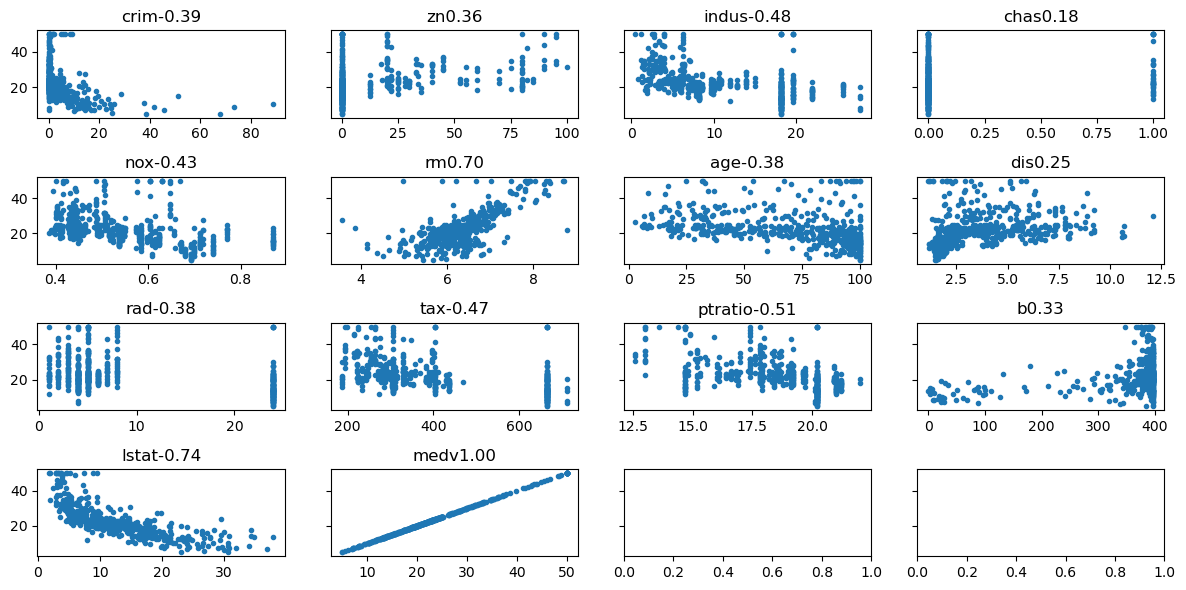

In [38]:
fig, ax = plt.subplots(4,4, sharey=True,figsize = (12,6))
ax = ax.flatten()
# print(ax[0])
for i in range(0,14):
    ax[i].plot(houDF.iloc[:,i],houDF['medv'], '.')
    ax[i].set_title(houDF.columns[i]+ str(f"{houDF.iloc[:,i].corr(houDF['medv']):.2f}"))

plt.tight_layout()
plt.show()    


medv 연관성 있는 데이터.
- rm, istat

In [39]:
feature = houDF[['rm','lstat']]
target = houDF['medv']


In [40]:
print(feature['rm'].max(), feature['rm'].min())
print(feature['lstat'].max(), feature['lstat'].min())
# 범위가 다르므로 범위Sclae 정규화 필요.

8.78 3.561
37.97 1.73


In [60]:
array = feature.to_numpy()
minmax = MinMaxScaler()
narr = minmax.fit_transform(array)
feature_a = pd.DataFrame(narr)

In [61]:
feature.head()

,rm,lstat
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [62]:
feature_a.head()

,0,1
0,0.577505,0.089680
1,0.547998,0.204470
2,0.694386,0.063466
3,0.658555,0.033389
4,0.687105,0.099338


[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [63]:
feature_a.columns = ['rm','lstat']

In [64]:
## 3-1 피처와 타겟 분리
featureDF = feature_a
targetSR = target
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [65]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.25,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (379, 2) / X_test => 2D, (127, 2)
y_train => 1D (379,) / y_test => 2D, (127,)


[4] 학습 진행

In [66]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [67]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [ 25.60957419 -24.53704046]
lr.intercept_ 16.565517857573795
X_train = 25.609574190746464*y_train + 16.565517857573795


[5] 성능 평가 <hr>
- 모델 성능 평가
- 손실 계산

In [68]:
## 모듈화
r_dict = {x:[] for x in ['score', 'r2score','rmse', 'mse', 'mae']}
for x, y in [[X_train,  y_train], [X_test, y_test]]:
    score = lr.score(x, y)
    pre_y = lr.predict(x)
    r2score = r2_score(y, pre_y)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    r_dict['score'].append(score)
    r_dict['r2score'].append(r2score)
    r_dict['rmse'].append(rmse)
    r_dict['mse'].append(mse)
    r_dict['mae'].append(mae)

r_dict    
    

{'score': [0.6414990470678075, 0.6263735009229204],
 'r2score': [0.6414990470678075, 0.6263735009229204],
 'rmse': [5.518974438713576, 5.552090760557373],
 'mse': [30.45907885517383, 30.825711813466555],
 'mae': [3.9792146576190035, 3.9223906377770708]}

In [69]:
resultDF = pd.DataFrame(r_dict, index=['train', 'test'])
resultDF

,score,r2score,rmse,mse,mae
train,0.641499,0.641499,5.518974,30.459079,3.979215
test,0.626374,0.626374,5.552091,30.825712,3.922391


In [70]:
# 3번쨰 차이 열 추가
resultDF.loc['diff'] = (resultDF.loc['train']-resultDF.loc['test']).abs()
resultDF.round(4)

,score,r2score,rmse,mse,mae
train,0.6415,0.6415,5.5190,30.4591,3.9792
test,0.6264,0.6264,5.5521,30.8257,3.9224
diff,0.0151,0.0151,0.0331,0.3666,0.0568


In [71]:
X_train

,rm,lstat
218,0.457942,0.446744
117,0.442805,0.376380
195,0.826595,0.034216
162,0.812608,0.005243
219,0.538801,0.241998
...,...,...
486,0.489174,0.365618
189,0.694386,0.100993
495,0.404100,0.437914
206,0.529795,0.254967


In [78]:
y1 = X_train['rm']*lr.coef_[0]+lr.intercept_-10
y2 = X_train['lstat']*lr.coef_[1]+lr.intercept_+15

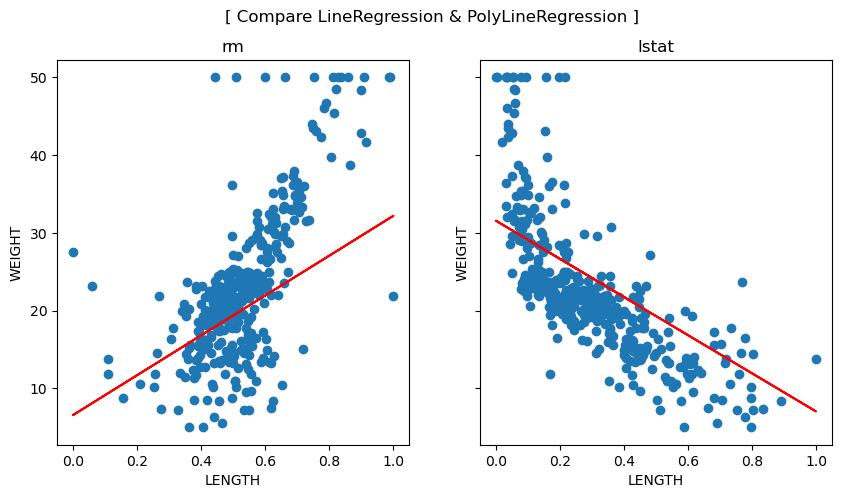

In [80]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5), sharey=True)

axes = axes.flatten()                               
# data_label = [[X_train, lr.predict(X_train)]]

for ax, title, col, ys in zip(axes, X_train.columns, X_train.columns, [y1, y2]):
    ax.plot(X_train[col], y_train, 'o', label='Fish')
    ax.plot(X_train[col],ys, 'r-', label='Poly Line')
    ax.set_xlabel("LENGTH")
    ax.set_ylabel("WEIGHT")
    ax.set_title(title)

plt.suptitle("[ Compare LineRegression & PolyLineRegression ]")
plt.show()

결과분석
- minmax로 정규화.
- 수치가 더 안좋아짐

해결방안
- 컬럼 생성하여 다항으로 
- lstat는 곡선같은데 rm은 직선으로 보임.

[6] 특성공학 - 피처 생성 추가


In [81]:
## [6-1] 모듈로딩
from sklearn.preprocessing import PolynomialFeatures

In [82]:
# x-train, x-test
poly = PolynomialFeatures() 

poly.fit(X_train)

poly_train = poly.transform(X_train)
poly_test  = poly.transform(X_test)

In [85]:
print(f'학습용 {type(poly_train)}, {poly_train.shape}')
print(f'테스트용 {type(poly_test)}, {poly_test.shape}')

학습용 <class 'numpy.ndarray'>, (379, 6)
테스트용 <class 'numpy.ndarray'>, (127, 6)


[7] 재학습 <hr>

In [86]:
## - 선형회귀인스턴스 생성
polyModel = LinearRegression()
## - 학습
polyModel.fit(poly_train, y_train)

LinearRegression()

In [87]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"polyModel.coef_ {polyModel.coef_}")
print(f"polyModel.intercept_ {polyModel.intercept_}")
print(f"X_train = {polyModel.coef_[0]}*y_train + {polyModel.intercept_}")

polyModel.coef_ [  0.           3.11965504   2.42119358  33.28157426 -66.5486977
   3.55248229]
polyModel.intercept_ 19.49527823487901
X_train = 0.0*y_train + 19.49527823487901


In [91]:
print( "min :", X_train.min().values[0], "max :", X_train.max().values[0] )
min_x, max_x = X_train.min().values[0], X_train.max().values[0]
# minmax 해서 0~1
## - 곡선 회귀식에 대입할 데이터 
x=np.linspace(0, 1)  # 1<= ~ <=42 범위에서 균등하게 50개[기본값] 데이터 생성 
print('shape :' , x.shape)
print(x)

min : 0.0 max : 0.9999999999999999
shape : (50,)
[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


In [92]:
## - 곡선 회귀식 : y = x^0*W0 + x^1*W1 x^2*W2 + b
y = (1*polyModel.coef_[0]) + (x * polyModel.coef_[1]) + ((x**2)*polyModel.coef_[2]) + polyModel.intercept_

print('shape :' , y.shape)
print(y)

shape : (50,)
[19.49527823 19.55995307 19.62664474 19.69535322 19.76607852 19.83882064
 19.91357959 19.99035535 20.06914794 20.14995735 20.23278358 20.31762663
 20.4044865  20.49336319 20.5842567  20.67716703 20.77209419 20.86903816
 20.96799896 21.06897658 21.17197102 21.27698227 21.38401035 21.49305526
 21.60411698 21.71719552 21.83229088 21.94940307 22.06853208 22.1896779
 22.31284055 22.43802002 22.56521631 22.69442942 22.82565935 22.95890611
 23.09416968 23.23145007 23.37074729 23.51206133 23.65539218 23.80073986
 23.94810436 24.09748568 24.24888382 24.40229879 24.55773057 24.71517917
 24.8746446  25.03612685]


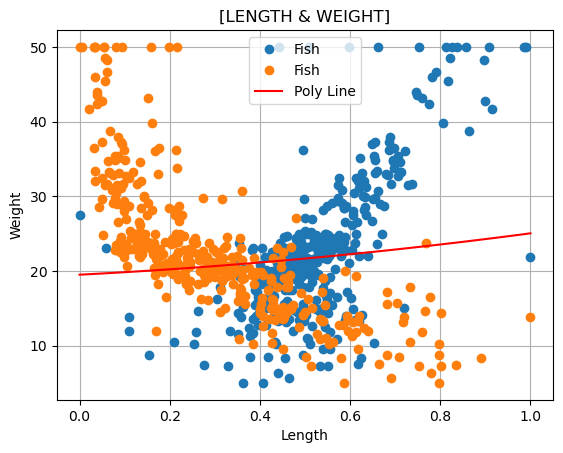

In [93]:
## 시각화 및 회귀선 -----------------------------------
## 데이터 시각화
plt.plot(X_train, y_train, 'o', label='Fish')

# 선형회귀에서 구한 y=model.coef_*x+model.intercept_ 공식의 직선 긋기
plt.plot(x, y, 'r-', label='Poly Line')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('[LENGTH & WEIGHT]')
plt.legend()
plt.grid()
plt.show()

In [96]:
## 모듈화
r_dict = {x:[] for x in ['score', 'r2score','rmse', 'mse', 'mae']}
for x, y in [[poly_train, y_train], [poly_test, y_test]]:
    score = polyModel.score(x, y)
    pre_y = polyModel.predict(x)
    r2score = r2_score(y, pre_y)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    r_dict['score'].append(score)
    r_dict['r2score'].append(r2score)
    r_dict['rmse'].append(rmse)
    r_dict['mse'].append(mse)
    r_dict['mae'].append(mae)

r_dict    
    

{'score': [0.7523956925041987, 0.7626561967629174],
 'r2score': [0.7523956925041987, 0.7626561967629174],
 'rmse': [4.586615382776009, 4.425136485996364],
 'mse': [21.037040669517516, 19.58183291969625],
 'mae': [3.14349988934384, 3.0809372037287863]}

In [101]:
resultDF2 = pd.DataFrame(r_dict, index=['ptrain', 'ptest'])
resultDF2.loc['diff'] = (resultDF.loc['train']-resultDF.loc['test']).abs()
resultDF2.round(4)

,score,r2score,rmse,mse,mae
ptrain,0.7524,0.7524,4.5866,21.0370,3.1435
ptest,0.7627,0.7627,4.4251,19.5818,3.0809
diff,0.0151,0.0151,0.0331,0.3666,0.0568


In [103]:
resultDF.round(4)

,score,r2score,rmse,mse,mae
train,0.6415,0.6415,5.5190,30.4591,3.9792
test,0.6264,0.6264,5.5521,30.8257,3.9224
diff,0.0151,0.0151,0.0331,0.3666,0.0568


평가
- 항 추가후 score 상승 확인.
- 2개라 그래프가 이쁘지 않음.
- 1개로.